# Análisis de Resultados de Mediciones

Este notebook carga y analiza los resultados de las mediciones realizadas en el script **punto3.py**.

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import glob

# Configurar el estilo de las gráficas
plt.style.use('classic')  # Usando un estilo incorporado de matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

# Cargar los Resultados de Calibración

Primero cargaremos los datos de calibración guardados en el archivo CSV.

In [37]:
# Buscar el archivo de calibración
notebook_path = Path().resolve()
parent_dir = notebook_path.parent
calibration_path = Path(parent_dir / 'results/measurements/punto_3')
try:
    # Intentar cargar el archivo de calibración
    calibration_file = next(calibration_path.glob('calibracion*.csv'))
    
    # Cargar datos de calibración
    df_calibration = pd.read_csv(calibration_file)
    print("Datos de Calibración:")
    print(df_calibration)
except StopIteration:
    print("No se encontró el archivo de calibración en:", calibration_path)

Datos de Calibración:
   escala_cm_px  error_validacion
0      0.054938         69.041027


# Cargar las Mediciones

Ahora cargaremos todas las mediciones realizadas y las mostraremos en una tabla formateada.

In [38]:
# Buscar el archivo de mediciones
try:
    # Intentar cargar el archivo de mediciones
    mediciones_file = next(calibration_path.glob('mediciones*.csv'))
    
    # Cargar datos de mediciones
    df_mediciones = pd.read_csv(mediciones_file)
    
    # Mostrar las mediciones con formato
    print("Mediciones Realizadas:")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    display(df_mediciones.style.format({
        'longitud_medida_px': '{:.2f}',
        'longitud_medida_cm': '{:.2f}',
        'longitud_real_cm': '{:.2f}',
        'error_relativo': '{:.2f}%'
    }))
except StopIteration:
    print("No se encontró el archivo de mediciones en:", calibration_path)

Mediciones Realizadas:


,tipo,objeto,longitud_medida_px,longitud_medida_cm,longitud_real_cm,error_relativo
0,Referencia,Cuadro,2129.69,117.00,117.00,0.00%
1,Validación,Mesa,907.85,49.87,161.10,69.04%
2,Medición,Objeto 1,565.41,31.06,nan,nan%


# Visualización de las Mediciones

Por último, cargaremos y mostraremos la imagen con todas las mediciones realizadas.

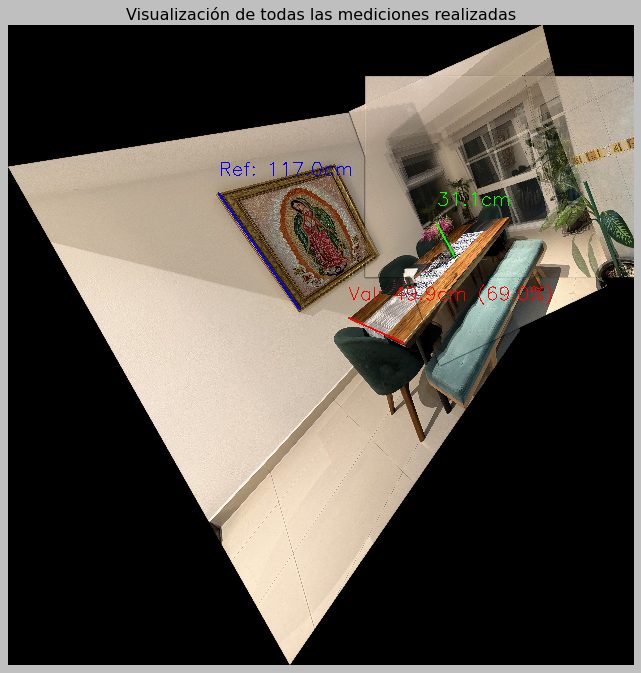


Archivos utilizados:
Calibración: calibracion.csv
Mediciones: mediciones.csv
Imagen: mediciones_visualizacion.jpg


In [39]:
# Buscar la imagen de mediciones

figures_path = Path(parent_dir / 'results/figures/punto_3')
try:
    # Intentar cargar la imagen
    image_file = next(figures_path.glob('mediciones_visualizacion*.jpg'))
    
    # Cargar y mostrar la imagen
    img = cv2.imread(str(image_file))
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Visualización de todas las mediciones realizadas")
    plt.axis('off')
    plt.show()
    
    print(f"\nArchivos utilizados:")
    print(f"Calibración: {calibration_file.name}")
    print(f"Mediciones: {mediciones_file.name}")
    print(f"Imagen: {image_file.name}")
except StopIteration:
    print("No se encontró la imagen de mediciones en:", figures_path)
except NameError:
    print("No se pudieron cargar todos los archivos necesarios.")